In [145]:
import pandas as pd
import numpy as np

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [146]:
df = pd.read_csv("Oscar_winning_movies.csv")

In [147]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Columns: 119 entries, year to release_date.day-of-week
dtypes: float64(10), int64(46), object(63)
memory usage: 1.1+ MB


(1235, 119)

In [148]:
df[df.columns[:119]]

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,...,0,NaN,0,NaN,0,NaN,2005.0,7.0,8.0,5.0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,...,0,NaN,0,NaN,0,NaN,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,tt0120737,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,...,0,NaN,1,Best Music,2,Best Music|Best Production Design,2001.0,12.0,19.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2018,Shoplifters,tt8075192,R,121,Crime|Drama,8.1,93.0,A family of small-time crooks take in a child ...,11471,...,0,NaN,1,Best Foreign Film,1,Best Foreign Film,NaN,NaN,NaN,NaN
1231,2018,Bao,tt8075496,G,8,Animation|Short|Family,7.5,NaN,A Chinese-Canadian woman suffering from empty ...,14730,...,0,NaN,0,NaN,0,NaN,2018.0,6.0,15.0,5.0
1232,2018,Capernaum,tt8267604,R,126,Drama,8.1,74.0,While serving a five-year sentence for a viole...,2964,...,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1233,2018,Animal Behaviour,tt8615478,NaN,14,Animation|Short|Comedy,6.4,NaN,Animated anthropomorphized characters in a the...,195,...,0,NaN,0,NaN,0,NaN,2018.0,6.0,11.0,1.0


In [149]:
num_columns = df.shape[1]

column_names = df.columns.tolist()
for name in column_names:
    print(name)

year
movie
movie_id
certificate
duration
genre
rate
metascore
synopsis
votes
gross
release_date
user_reviews
critic_reviews
popularity
awards_wins
awards_nominations
Oscar_Best_Picture_won
Oscar_Best_Picture_nominated
Oscar_Best_Director_won
Oscar_Best_Director_nominated
Oscar_Best_Actor_won
Oscar_Best_Actor_nominated
Oscar_Best_Actress_won
Oscar_Best_Actress_nominated
Oscar_Best_Supporting_Actor_won
Oscar_Best_Supporting_Actor_nominated
Oscar_Best_Supporting_Actress_won
Oscar_Best_Supporting_Actress_nominated
Oscar_Best_AdaScreen_won
Oscar_Best_AdaScreen_nominated
Oscar_Best_OriScreen_won
Oscar_Best_OriScreen_nominated
Oscar_nominated
Oscar_nominated_categories
Golden_Globes_won
Golden_Globes_won_categories
Golden_Globes_nominated
Golden_Globes_nominated_categories
BAFTA_won
BAFTA_won_categories
BAFTA_nominated
BAFTA_nominated_categories
Screen_Actors_Guild_won
Screen_Actors_Guild_won_categories
Screen_Actors_Guild_nominated
Screen_Actors_Guild_nominated_categories
Critics_Choice_won


In [150]:
df= df.fillna(0)
df.head(15)

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,0,0,0,0,0,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,...,0,0,0,0,0,0,2005.0,7.0,8.0,5.0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,...,0,0,0,0,0,0,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,tt0120737,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,...,0,0,1,Best Music,2,Best Music|Best Production Design,2001.0,12.0,19.0,3.0
5,2000,Mission: Impossible II,tt0120755,PG-13,123,Action|Adventure|Thriller,6.1,59.0,"A secret agent is sent to Sydney, to find and ...",249988,...,0,0,0,0,0,0,2000.0,5.0,24.0,3.0
6,2002,Resident Evil,tt0120804,R,100,Action|Horror|Sci-Fi,6.7,33.0,"A special military unit fights a powerful, out...",204545,...,0,0,0,0,0,0,2002.0,3.0,15.0,5.0
7,2000,X-Men,tt0120903,PG-13,104,Action|Adventure|Sci-Fi,7.4,64.0,Two mutants come to a private academy for thei...,468351,...,0,0,0,0,0,0,2000.0,7.0,14.0,5.0
8,2000,The Emperor's New Groove,tt0120917,G,78,Animation|Adventure|Comedy,7.3,70.0,Emperor Kuzco is turned into a llama by his ex...,133781,...,0,0,0,0,0,0,2000.0,12.0,15.0,5.0
9,2005,Corpse Bride,tt0121164,PG,77,Animation|Drama|Family,7.4,83.0,When a shy groom practices his wedding vows in...,197604,...,1,Best Animated Film,0,0,0,0,2005.0,9.0,23.0,5.0


In [151]:
df_work = df.drop(['movie_id', 'gross', 'Golden_Globes_won_categories', 'Golden_Globes_nominated_categories', 'BAFTA_won_categories', 'BAFTA_nominated_categories', 'Screen_Actors_Guild_won_categories', 'Screen_Actors_Guild_nominated_categories', 'Critics_Choice_won_categories', 'Critics_Choice_nominated_categories', 'Directors_Guild_nominated_categories', 'Producers_Guild_won_categories', 'Producers_Guild_nominated_categories', 'Art_Directors_Guild_nominated_categories', 'Writers_Guild_nominated_categories', 'Costume_Designers_Guild_nominated_categories', 'Online_Film_Television_Association_won_categories', 'Online_Film_Television_Association_nominated_categories', 'Online_Film_Critics_Society_won_categories', 'Online_Film_Critics_Society_nominated_categories', 'People_Choice_won_categories', 'People_Choice_nominated_categories', 'London_Critics_Circle_Film_nominated_categories', 'American_Cinema_Editors_nominated_categories', 'Austin_Film_Critics_Association_nominated_categories', 'Denver_Film_Critics_Society_nominated_categories', 'Boston_Society_of_Film_Critics_won_categories', 'Boston_Society_of_Film_Critics_nominated_categories', 'New_York_Film_Critics_Circle_won_categories', 'New_York_Film_Critics_Circle_nominated_categories', 'Los_Angeles_Film_Critics_Association_won_categories', 'Los_Angeles_Film_Critics_Association_nominated_categories'], axis=1)
df_work.head()

,year,movie,certificate,duration,genre,rate,metascore,synopsis,votes,release_date,...,Boston_Society_of_Film_Critics_won,Boston_Society_of_Film_Critics_nominated,New_York_Film_Critics_Circle_won,New_York_Film_Critics_Circle_nominated,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_nominated,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,2001-12-25,...,0,0,0,0,0,0,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,2000-06-23,...,0,0,1,1,1,1,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,2005-07-08,...,0,0,0,0,0,0,2005.0,7.0,8.0,5.0
3,2002,Frida,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,2002-11-22,...,0,0,0,0,0,0,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,2001-12-19,...,0,1,0,0,1,2,2001.0,12.0,19.0,3.0


In [ ]:
df_work = df_work.replace({'No': 0, 'Yes': 1})

In [152]:
num_columns = df_work.shape[1]

column_names = df_work.columns.tolist()
for name in column_names:
    print(name)

year
movie
certificate
duration
genre
rate
metascore
synopsis
votes
release_date
user_reviews
critic_reviews
popularity
awards_wins
awards_nominations
Oscar_Best_Picture_won
Oscar_Best_Picture_nominated
Oscar_Best_Director_won
Oscar_Best_Director_nominated
Oscar_Best_Actor_won
Oscar_Best_Actor_nominated
Oscar_Best_Actress_won
Oscar_Best_Actress_nominated
Oscar_Best_Supporting_Actor_won
Oscar_Best_Supporting_Actor_nominated
Oscar_Best_Supporting_Actress_won
Oscar_Best_Supporting_Actress_nominated
Oscar_Best_AdaScreen_won
Oscar_Best_AdaScreen_nominated
Oscar_Best_OriScreen_won
Oscar_Best_OriScreen_nominated
Oscar_nominated
Oscar_nominated_categories
Golden_Globes_won
Golden_Globes_nominated
BAFTA_won
BAFTA_nominated
Screen_Actors_Guild_won
Screen_Actors_Guild_nominated
Critics_Choice_won
Critics_Choice_nominated
Directors_Guild_won
Directors_Guild_won_categories
Directors_Guild_nominated
Producers_Guild_won
Producers_Guild_nominated
Art_Directors_Guild_won
Art_Directors_Guild_won_categor

In [172]:
sales_df = df_work[[x for x in df_work.columns if 'rate' in x] + ['year']]
sum_sales_by_year = sales_df.groupby('year').mean()

fig = go.Figure(data=[go.Bar(name=column, x=sum_sales_by_year.index, y=sum_sales_by_year[column]) for column in sum_sales_by_year.columns])

fig.update_layout(title='Сумма оценок по годам', xaxis_title='Год', yaxis_title='Сумма оценок')

In [173]:
sales_df = df_work[[x for x in df_work.columns if 'metascore' in x] + ['year']]
sum_sales_by_year = sales_df.groupby('year').mean()

fig = go.Figure(data=[go.Bar(name=column, x=sum_sales_by_year.index, y=sum_sales_by_year[column]) for column in sum_sales_by_year.columns])

fig.update_layout(title='Сумма оценок по годам', xaxis_title='Год', yaxis_title='Сумма оценок')

In [169]:
sales_df1 = df_work[[x for x in df_work.columns if 'rate' in x] + ['metascore']]
mean_sales_by_metascore = sales_df1.groupby('metascore').mean()

# Построение графика с использованием Plotly
fig = go.Figure(data=[
    go.Scatter(x=mean_sales_by_metascore.index, y=mean_sales_by_metascore[column], mode='markers+lines', name=column) 
    for column in mean_sales_by_metascore.columns
])

# Настройка макета графика
fig.update_layout(title='Средние значения продаж по категориям метаскора',
                   xaxis_title='Метаскор',
                   yaxis_title='Средние значения продаж')

In [157]:
selected_columns = ['Oscar_Best_Picture_nominated', 'Oscar_Best_Director_nominated', 'Oscar_Best_Actor_nominated', 'Oscar_Best_Actress_nominated', 'Oscar_Best_Supporting_Actor_nominated', 'Oscar_Best_AdaScreen_nominated', 'Oscar_Best_OriScreen_nominated']
sum_values = df_work[selected_columns].sum()

fig = go.Figure(data=[go.Bar(x=sum_values.index, y=sum_values.values)])

fig.update_layout(title='Сумма номинаций по различным категориям',
                   xaxis_title='Категории',
                   yaxis_title='Сумма номинаций',
                   xaxis_tickangle=-45,  
                   width=800, height=600)  


<Axes: xlabel='year'>

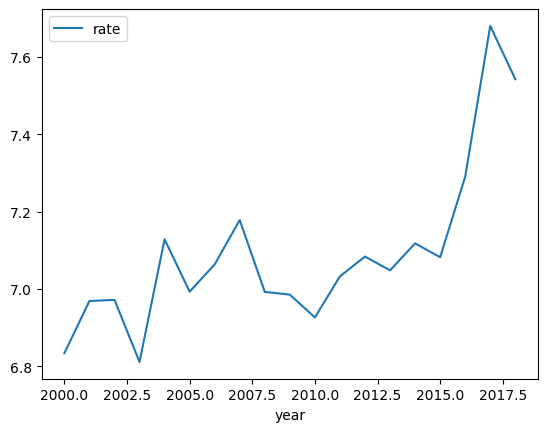

In [163]:
sales_df = df_work[[x for x in df.columns if 'rate' in x] + ['year']]
sales_df.groupby('year').mean().plot()

<Axes: xlabel='year'>

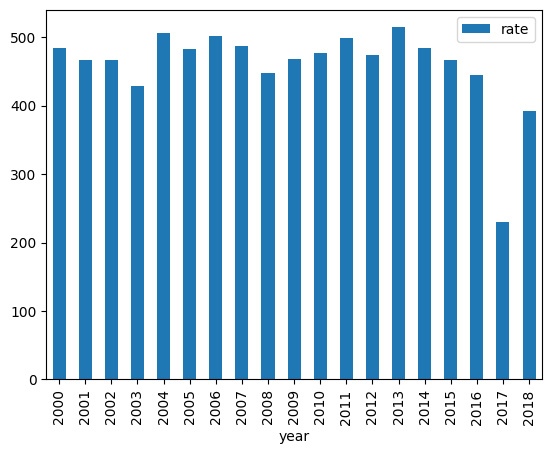

In [ ]:
sales_df.groupby('year').sum().plot(kind='bar')

In [165]:
fig = go.Figure(data=[
    go.Bar(name=column, x=sum_sales_by_year.index, y=sum_sales_by_year[column]) for column in sum_sales_by_year.columns
])

# Настройка макета графика
fig.update_layout(title='Сумма продаж по годам',
                   xaxis_title='Год',
                   yaxis_title='Сумма продаж')

NameError: name 'sum_sales_by_year' is not defined

<Axes: xlabel='Oscar_Best_Picture_won'>

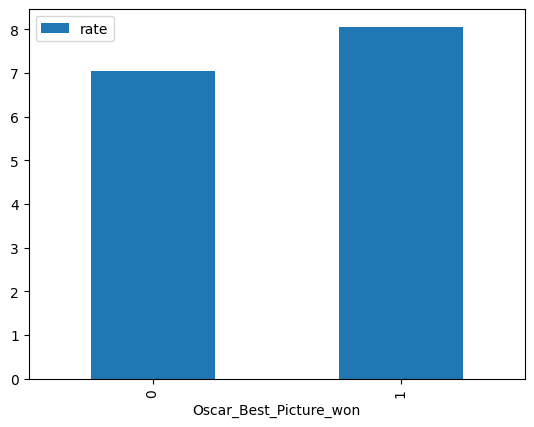

In [ ]:
sales_df_oscar.groupby('Oscar_Best_Picture_won').mean().plot(kind='bar')

In [ ]:
df_work['London_Critics_Circle_Film_won'].sum()

198

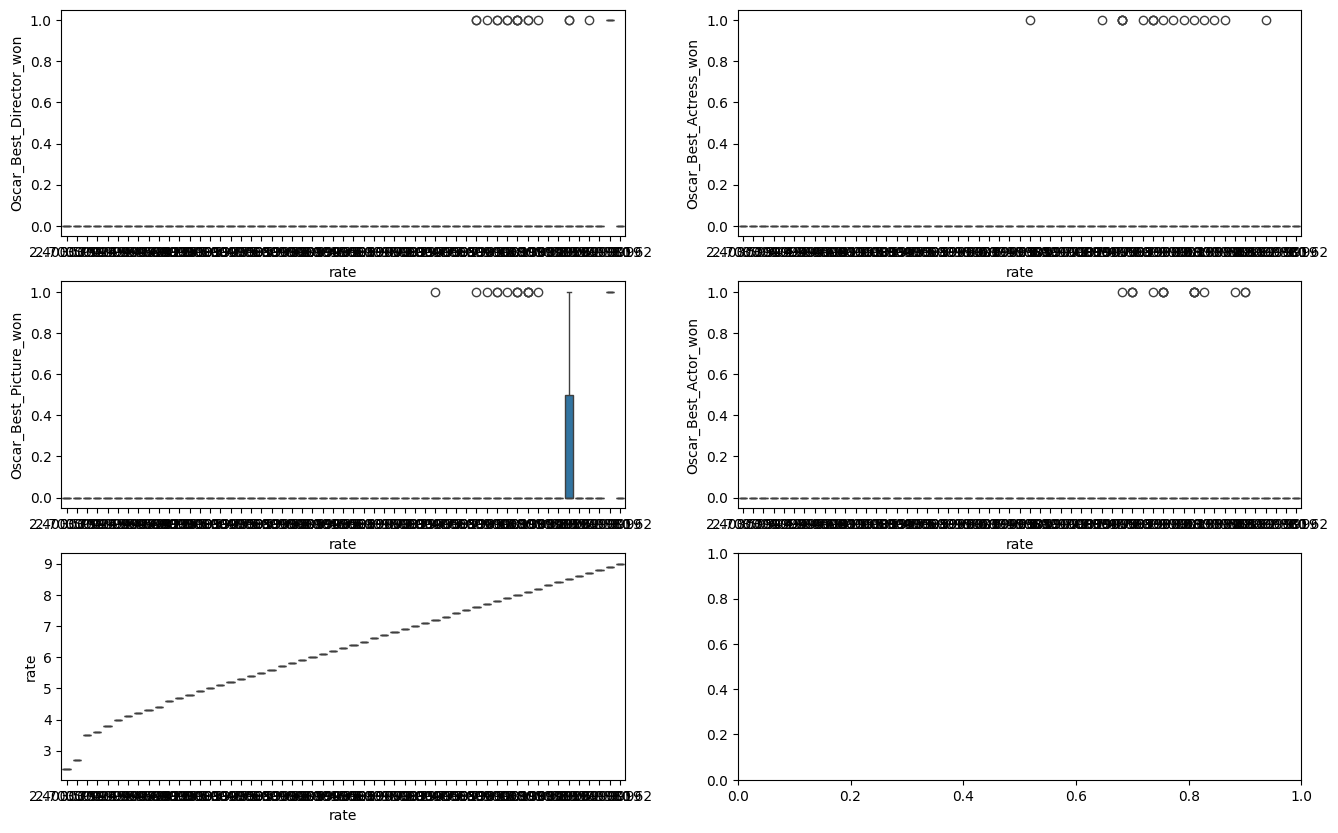

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16,10))

feature = list(set(['rate', 'Oscar_Best_Picture_won', 'Oscar_Best_Director_won', 'Oscar_Best_Actor_won', 'Oscar_Best_Actress_won']))

for idx, feat in enumerate(feature):
    sns.boxplot(x='rate', y=feat, data = df_work, ax = axes[idx//2, idx%2])
    axes[idx//2, idx%2].set_xlabel('rate')
    axes[idx//2, idx%2].set_ylabel(feat)